___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Tensorflow Project 
Let's wrap up this Deep Learning by taking a a quick look at the effectiveness of Neural Nets!

We'll use the [Bank Authentication Data Set](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) from the UCI repository.

The data consists of 5 columns:

* variance of Wavelet Transformed image (continuous)
* skewness of Wavelet Transformed image (continuous)
* curtosis of Wavelet Transformed image (continuous)
* entropy of image (continuous)
* class (integer)

Where class indicates whether or not a Bank Note was authentic.

This sort of task is perfectly suited for Neural Networks and Deep Learning! Just follow the instructions below to get started!

## Get the Data

** Use pandas to read in the bank_note_data.csv file **

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('bank_note_data.csv')

** Check the head of the Data **

In [3]:
data.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## EDA

We'll just do a few quick plots of the data.

** Import seaborn and set matplolib inline for viewing **

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

** Create a Countplot of the Classes (Authentic 1 vs Fake 0) **

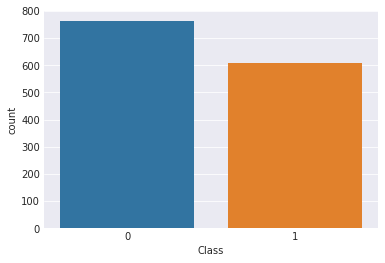

In [5]:
sns.countplot(x = 'Class', data=data) # x = data.Class

** Create a PairPlot of the Data with Seaborn, set Hue to Class **

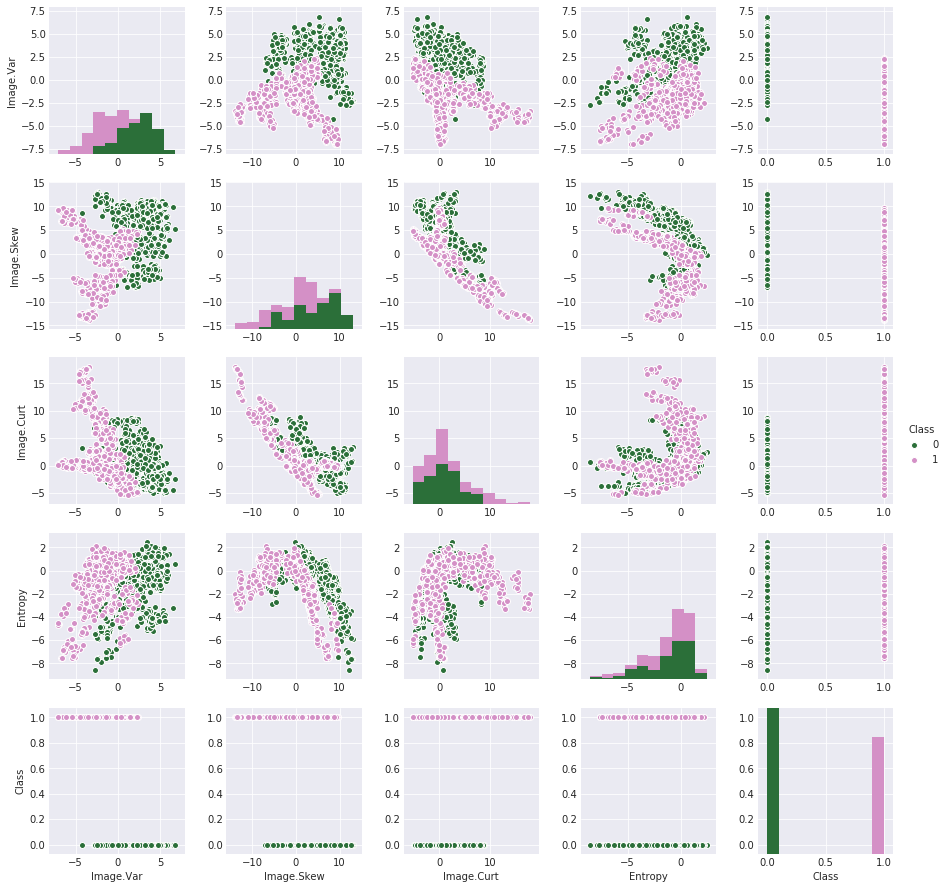

In [6]:
sns.pairplot(data,hue='Class', palette="cubehelix")

## Data Preparation 

When using Neural Network and Deep Learning based systems, it is usually a good idea to Standardize your data, this step isn't actually necessary for our particular data set, but let's run through it for practice!

### Standard Scaling

** Import StandardScaler() from SciKit Learn**

In [7]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

/home/sheikh/miniconda3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/sheikh/miniconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
from sklearn.preprocessing import StandardScaler

**Create a StandardScaler() object called scaler.**

In [9]:
scaler = StandardScaler()

**Fit scaler to the features.**

In [10]:
scaler.fit(data.drop('Class', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

**Use the .transform() method to transform the features to a scaled version.**

In [11]:
scaled_features = scaler.fit_transform(data.drop('Class', axis=1))

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [12]:
df_feat = pd.DataFrame(scaled_features, columns=data.columns[:-1])
df_feat.head()

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


## Train Test Split

** Create two objects X and y which are the scaled feature values and labels respectively.**

In [13]:
X = df_feat
y = data['Class']

** Use the .as_matrix() method on X and Y and reset them equal to this result. We need to do this in order for TensorFlow to accept the data in Numpy array form instead of a pandas series. **

In [14]:
X = X.as_matrix()
y = y.as_matrix()

In [15]:
X = np.float32(X)

** Use SciKit Learn to create training and testing sets of the data as we've done in previous lectures:**

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [17]:
X_train[:5]

array([[ 0.8854353 ,  0.0557273 , -0.01202915,  0.54973215],
       [ 0.07137026,  0.55904186, -1.5350099 , -2.3470776 ],
       [ 0.01908514,  0.2803942 , -1.3428994 , -1.2474452 ],
       [-1.0746057 , -1.4961636 ,  1.1185607 ,  0.27082837],
       [ 0.46150282,  0.4909651 ,  0.1601902 ,  0.86557734]],
      dtype=float32)

# Contrib.learn

** Import tensorflow.contrib.learn.python.learn as learn**

In [ ]:
#done at the beginning

** Create an object called classifier which is a DNNClassifier from learn. Set it to have 2 classes and a [10,20,10] hidden unit layer structure:**

In [18]:
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=4)]

In [19]:
classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns,
                                            hidden_units=[10, 20, 10],
                                            n_classes=2,
                                            model_dir="./output1")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fb5236e3dd8>, '_num_ps_replicas': 0, '_task_id': 0, '_log_step_count_steps': 100, '_num_worker_replicas': 0, '_evaluation_master': '', '_is_chief': True, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_tf_random_seed': None, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': './output1', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_session_config': None, '_keep_checkpoint_max': 5, '_save_checkpoints_secs': 600, '_master': '', '_environment': 'local', '_task_type': None}


** Now fit classifier to the training data. Use steps=200 with a batch_size of 20. You can play around with these values if you want!**

*Note: Ignore any warnings you get, they won't effect your output*

In [20]:
classifier.fit(X_train, y_train, steps=2000)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Please switch to tf.train.get_global_step
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from ./output1/model.ckpt-8000
INFO:tensorflow:Saving checkpoints for 8001 into ./output1/model.ckpt.
INFO:tensorflow:loss = 6.937329e-05, step = 8001
INFO:tensorflow:global_step/sec: 53.1833
INFO:tensorflow:loss = 6.795227e-05, step = 8101 (

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinaryLogisticHead object at 0x7fb5236e3d30>, 'feature_columns': (_RealValuedColumn(column_name='', dimension=4, default_value=None, dtype=tf.float32, normalizer=None),), 'activation_fn': <function relu at 0x7fb538b9af28>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'optimizer': None, 'input_layer_min_slice_size': None, 'hidden_units': [10, 20, 10]})

In [21]:
accuracy_score = classifier.evaluate(X_test, y_test)['accuracy']

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Starting evaluation at 2018-03-11-00:40:29
INFO:tensorflow:Restoring parameters from ./output1/model.ckpt-10000
INFO:tensorflow:Finished evaluation at 2018-03-11-00:40:31
INFO:tensorflow:Saving dict for global step 10000: accuracy = 1.0, accuracy/baseline_label_mean = 0.42475727, accuracy/threshold_0.500000_mean = 1.0, auc = 1.0, auc_precision_recall = 1.0, global_step = 10

In [22]:
print('Accuracy: {0:f}'.format(accuracy_score))

Accuracy: 1.000000


## Model Evaluation

** Use the predict method from the classifier model to create predictions from X_test **

In [23]:
bank_predictions = list(classifier.predict(X_test))

Instructions for updating:
Please switch to predict_classes, or set `outputs` argument.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Restoring parameters from ./output1/model.ckpt-10000


** Now create a classification report and a Confusion Matrix. Does anything stand out to you?**

In [24]:
print(confusion_matrix(y_test, bank_predictions))

[[237   0]
 [  0 175]]


In [25]:
print(classification_report(y_test, bank_predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       237
          1       1.00      1.00      1.00       175

avg / total       1.00      1.00      1.00       412



## Optional Comparison

** You should have noticed extremely accurate results from the DNN model. Let's compare this to a Random Forest Classifier for a reality check!**

**Use SciKit Learn to Create a Random Forest Classifier and compare the confusion matrix and classification report to the DNN model**

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rfc = RandomForestClassifier(n_estimators=200)

In [28]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [29]:
rfc_preds = rfc.predict(X_test)

In [30]:
print(classification_report(y_test,rfc_preds))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       237
          1       0.99      1.00      1.00       175

avg / total       1.00      1.00      1.00       412



In [31]:
print(confusion_matrix(y_test,rfc_preds))

[[236   1]
 [  0 175]]


** It should have also done very well, but not quite as good as the DNN model. Hopefully you have seen the power of DNN! **

# Great Job!